In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!pip install seaborn

In [11]:
df = pd.read_csv('Antfile17.CSV')

In [12]:
print(df['bug'].value_counts())

bug
0    579
1    166
Name: count, dtype: int64


In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.10, random_state=42, stratify=y_resampled
)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
[[43 14]
 [ 5 52]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        57
           1       0.79      0.91      0.85        57

    accuracy                           0.83       114
   macro avg       0.84      0.83      0.83       114
weighted avg       0.84      0.83      0.83       114



In [20]:
accuracy_scores = []
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc)

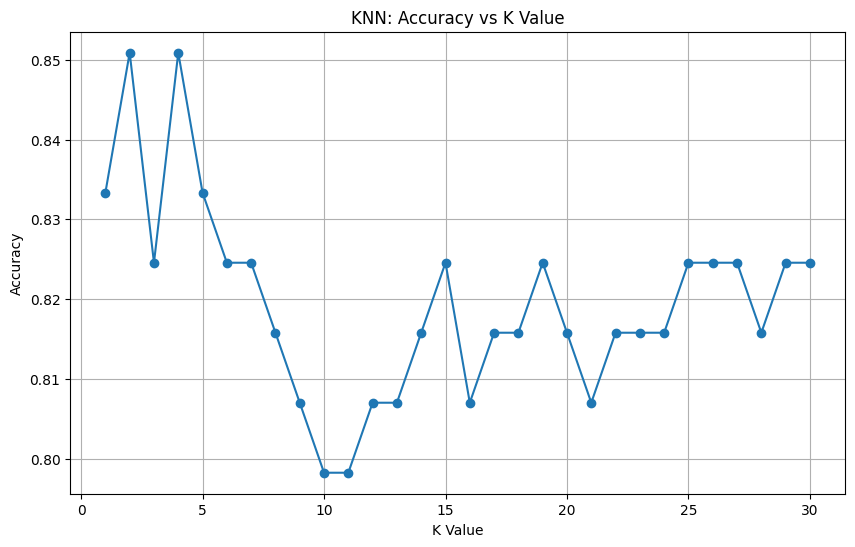

In [21]:
plt.figure(figsize=(10,6))
plt.plot(k_range, accuracy_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K Value')
plt.grid(True)
plt.show()

In [22]:
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

In [23]:
print("Best K:", best_k)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best K: 2
Accuracy: 0.8508771929824561
[[48  9]
 [ 8 49]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        57
           1       0.84      0.86      0.85        57

    accuracy                           0.85       114
   macro avg       0.85      0.85      0.85       114
weighted avg       0.85      0.85      0.85       114

